In [29]:
import tensorflow as tf

In [30]:
# get data

# The actual line
TRUE_W = 3.0
TRUE_B = 2.0

NUM_EXAMPLES = 1000

# A vector of random x values
x = tf.random.normal(shape=[NUM_EXAMPLES])

# Generate some noise
noise = tf.random.normal(shape=[NUM_EXAMPLES])

# Calculate y
y = x * TRUE_W + TRUE_B + noise

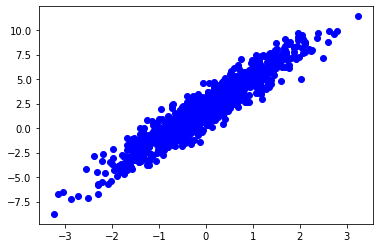

In [31]:
import matplotlib.pyplot as plt

plt.scatter(x,y,c='b')
plt.show()

In [32]:
# Define Model

class MyModel(tf.Module):
  def __init__(self, **kwargs):
    super().__init__(**kwargs)
    # Initialize the weights to `5.0` and the bias to `0.0`
    self.w = tf.Variable(5.0) 
    self.b = tf.Variable(0.0)

  def __call__(self, x):
    return self.w * x + self.b

model = MyModel()

# List the variables tf.modules's built-in variable aggregation.
print("Variables:", model.variables)

# Verify the model works
assert model(3.0).numpy() == 15.0

Variables: (<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>, <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.0>)


In [33]:
# define loss function

# This computes a single loss value for an entire batch
def loss(target_y, predicted_y):
  return tf.reduce_mean(tf.square(target_y - predicted_y))

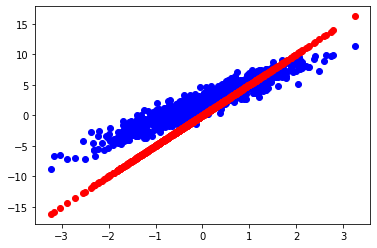

Current loss: 8.890514


In [34]:
plt.scatter(x, y, c="b")
plt.scatter(x, model(x), c="r")
plt.show()

print("Current loss: %1.6f" % loss(y, model(x)).numpy())

In [35]:
# define training loop
# loop {
# 모델을 통해 입력 배치를 전송하여 출력 생성
# 출력끼리 비교 -> 손실 계산
# gradient tape를 사용해 gradient 찾기
# gradient로 변수 최적화
# }

def train(model, x, y, learning_rate):

  with tf.GradientTape() as t:
    current_loss = loss(y, model(x))

  dw, db = t.gradient(current_loss, [model.w, model.b])

  # Subtract the gradient scaled by the learning rate
  model.w.assign_sub(learning_rate * dw)
  model.b.assign_sub(learning_rate * db)

In [36]:
model = MyModel()

Ws, bs = [], []
epochs = range(10)

# training loop
def training_loop(model, x, y):

  for epoch in epochs:
    train(model, x, y, learning_rate=0.1)

    Ws.append(model.w.numpy())
    bs.append(model.b.numpy())
    current_loss = loss(y, model(x))

    print("Epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f" %
          (epoch, Ws[-1], bs[-1], current_loss))

Starting: W=5.00 b=0.00, loss=8.89051
Epoch  0: W=4.61 b=0.41, loss=6.04901
Epoch  1: W=4.30 b=0.73, loss=4.23058
Epoch  2: W=4.05 b=0.99, loss=3.06674
Epoch  3: W=3.84 b=1.19, loss=2.32178
Epoch  4: W=3.68 b=1.35, loss=1.84487
Epoch  5: W=3.55 b=1.48, loss=1.53954
Epoch  6: W=3.45 b=1.59, loss=1.34403
Epoch  7: W=3.36 b=1.67, loss=1.21882
Epoch  8: W=3.29 b=1.73, loss=1.13863
Epoch  9: W=3.24 b=1.78, loss=1.08727


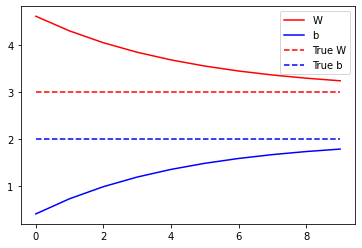

In [37]:
print("Starting: W=%1.2f b=%1.2f, loss=%2.5f" %
      (model.w, model.b, loss(y, model(x))))

# training
training_loop(model, x, y)

# Plotting
plt.plot(epochs, Ws, "r",
         epochs, bs, "b")

plt.plot([TRUE_W] * len(epochs), "r--",
         [TRUE_B] * len(epochs), "b--")

plt.legend(["W", "b", "True W", "True b"])
plt.show()

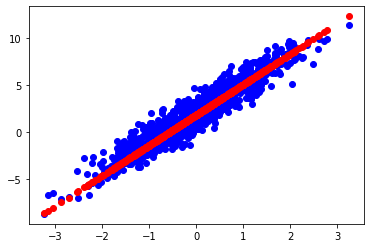

Current loss: 1.087266


In [39]:
plt.scatter(x, y, c='b')
plt.scatter(x, model(x), c='r')
plt.show()

print("Current loss: %1.6f" % loss(model(x), y).numpy())

## Use Keras

In [40]:
class MyModelKeras(tf.keras.Model):
  def __init__(self, **kwargs):
    super().__init__(**kwargs)
    self.w = tf.Variable(5.0)
    self.b = tf.Variable(0.0)

  def call(self, x):
    return self.w * x + self.b

keras_model = MyModelKeras()

training_loop(keras_model, x, y)

Epoch  0: W=4.61 b=0.41, loss=6.04901
Epoch  1: W=4.30 b=0.73, loss=4.23058
Epoch  2: W=4.05 b=0.99, loss=3.06674
Epoch  3: W=3.84 b=1.19, loss=2.32178
Epoch  4: W=3.68 b=1.35, loss=1.84487
Epoch  5: W=3.55 b=1.48, loss=1.53954
Epoch  6: W=3.45 b=1.59, loss=1.34403
Epoch  7: W=3.36 b=1.67, loss=1.21882
Epoch  8: W=3.29 b=1.73, loss=1.13863
Epoch  9: W=3.24 b=1.78, loss=1.08727


In [41]:
keras_model = MyModelKeras()

keras_model.compile(
  run_eagerly = False,
  optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
  loss=tf.keras.losses.mean_squared_error,
)

In [42]:
print(x.shape[0])
keras_model.fit(x, y, epochs=10, batch_size=1000)

1000
Epoch 1/10
1/1 [==============================] - 1s 611ms/step - loss: 8.8905
Epoch 2/10
1/1 [==============================] - 0s 7ms/step - loss: 6.0490
Epoch 3/10
1/1 [==============================] - 0s 7ms/step - loss: 4.2306
Epoch 4/10
1/1 [==============================] - 0s 8ms/step - loss: 3.0667
Epoch 5/10
1/1 [==============================] - 0s 7ms/step - loss: 2.3218
Epoch 6/10
1/1 [==============================] - 0s 7ms/step - loss: 1.8449
Epoch 7/10
1/1 [==============================] - 0s 9ms/step - loss: 1.5395
Epoch 8/10
1/1 [==============================] - 0s 10ms/step - loss: 1.3440
Epoch 9/10
1/1 [==============================] - 0s 12ms/step - loss: 1.2188
Epoch 10/10
1/1 [==============================] - 0s 7ms/step - loss: 1.1386
